In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('scoring.csv')

In [39]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               250 non-null    int64  
 1   GP  Games played                         250 non-null    int64  
 2   GS  Games started                        250 non-null    int64  
 3   MPG  Minutes Per Game                    250 non-null    float64
 4   PPG  Points Per Game                     250 non-null    float64
 5   FGM  Field Goals Made                    250 non-null    int64  
 6   FGA  Field Goals Attempted               250 non-null    int64  
 7   FG%  Field Goal Percentage               250 non-null    float64
 8   3FGM  Three-Point Field Goals Made       250 non-null    int64  
 9   3FGA  Three-Point Field Goals Attempted  250 non-null    int64  
 10  3FG%  Three-Point Field Goal Percentage  250 non-n

In [40]:
df.columns = ['', 'GP', 'GS', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3FGM', '3FGA', '3FG%', 'FTM', 'FTA', 'FT%', 'Player', 'Position', 'Team']

In [41]:
grouped_data = df.groupby("Position").sum(numeric_only=True)
#Pozycje G i F nie są zdefiniowane, jak podejrzewamy są uproszczeniem od pozycji PF/PG/SG
grouped_data = grouped_data.drop("F")
grouped_data = grouped_data.drop("G")

Text(0, 0.5, 'Trafione rzuty za 3pkt')

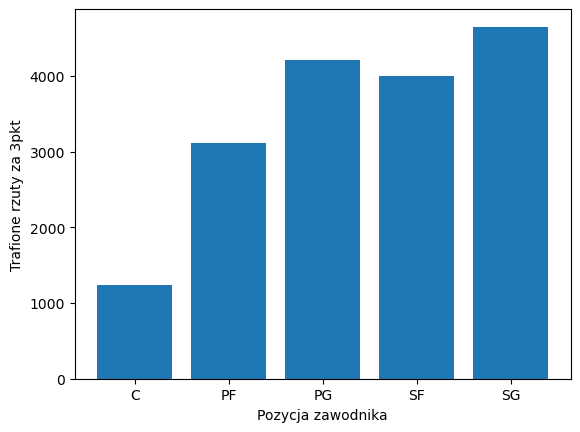

In [42]:
plt.bar(grouped_data.index, grouped_data["3FGA"])
plt.xlabel("Pozycja zawodnika")
plt.ylabel("Trafione rzuty za 3pkt")

In [43]:
grouped_data

,,GP,GS,MPG,PPG,FGM,FGA,FG%,3FGM,3FGA,FTM,FTA
Position,,,,,,,,,,,,
C,6680,888,508,1127.3,529.8,3784,6728,2766.5,437,1239,1729,2410
PF,5897,882,556,1225.8,582.0,4098,8332,2330.4,1105,3112,1798,2323
PG,5421,925,579,1360.7,697.4,4685,10533,2209.7,1505,4206,2012,2490
SF,7258,1022,593,1388.6,624.5,4302,9405,2436.5,1442,3994,1817,2244
SG,5669,924,447,1277.3,650.3,4378,9904,2152.4,1709,4650,1909,2329


In [44]:
plt.pie(grouped_data['Player'], labels=grouped_data.index, autopct='%1.1f%%')
plt.show()

KeyError: 'Player'

In [45]:
teams_data = df[(df.Team=="BOS")|(df.Team=="LAL")|(df.Team=="GS")|(df.Team=="CHI")|(df.Team=="WAS")]

In [46]:
teams_data

,,GP,GS,MPG,PPG,FGM,FGA,FG%,3FGM,3FGA,3FG%,FTM,FTA,FT%,Player,Position,Team
1,1,20,20,34.7,31.4,214,413,51.8,103,236,43.6,97,107,90.7,Stephen Curry,PG,GS
4,4,20,20,36.6,30.8,201,418,48.1,66,190,34.7,147,169,87.0,Jayson Tatum,PF,BOS
10,10,17,17,34.5,26.2,168,294,57.1,4,19,21.1,106,130,81.5,Anthony Davis,C,LAL
11,11,20,20,34.9,26.2,187,364,51.4,10,31,32.3,139,158,88.0,DeMar DeRozan,SF,CHI
12,12,19,19,35.4,26.1,187,369,50.7,43,125,34.4,79,95,83.2,Jaylen Brown,SF,BOS
16,16,15,15,36.6,23.5,134,254,52.8,28,74,37.8,56,62,90.3,Bradley Beal,SG,WAS
26,26,20,20,32.0,21.4,145,308,47.1,45,120,37.5,92,113,81.4,Kristaps Porzingis,C,WAS
28,28,16,16,34.1,20.9,116,287,40.4,47,132,35.6,56,68,82.4,Zach LaVine,SG,CHI
34,34,20,20,34.4,20.4,154,332,46.4,46,147,31.3,54,74,73.0,Kyle Kuzma,PF,WAS
46,46,20,20,32.9,18.6,144,290,49.7,57,133,42.9,27,39,69.2,Andrew Wiggins,SF,GS


In [47]:
teams_grouped = teams_data.groupby("Team").sum(numeric_only=True)

In [48]:
teams_grouped

,,GP,GS,MPG,PPG,FGM,FGA,FG%,3FGM,3FGA,FTM,FTA
Team,,,,,,,,,,,,
BOS,1022,170,101,243.8,126.4,850,1698,469.1,330,810,380,444
CHI,1408,183,100,244.4,115.0,783,1652,475.4,189,518,369,441
GS,1220,177,107,224.5,114.5,834,1733,441.0,311,829,296,367
LAL,893,122,63,176.6,87.5,559,1157,338.2,119,358,286,346
WAS,927,152,91,212.7,106.6,734,1563,388.8,194,568,307,392


Text(0, 0.5, 'Trafione rzuty z boiska w sezonie 2019-20')

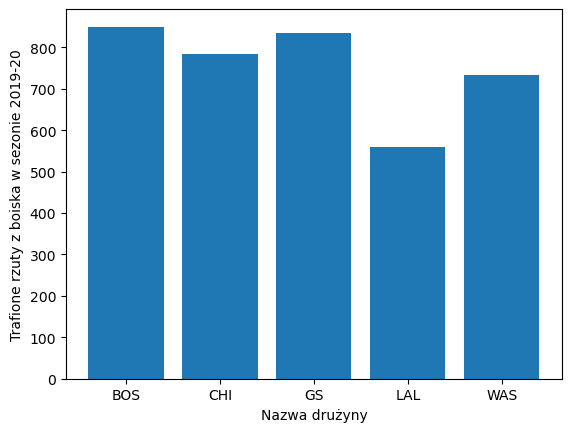

In [49]:
plt.bar(teams_grouped.index, teams_grouped["FGM"])
plt.xlabel("Nazwa drużyny")
plt.ylabel("Trafione rzuty z boiska w sezonie 2019-20")

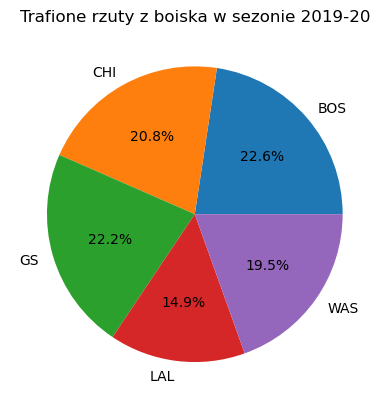

In [50]:
plt.pie(teams_grouped["FGM"], labels=teams_grouped.index, autopct='%1.1f%%')
plt.title('Trafione rzuty z boiska w sezonie 2019-20')
plt.show()

In [51]:
teams_grouped.index

Index(['BOS', 'CHI', 'GS', 'LAL', 'WAS'], dtype='object', name='Team')

Text(0, 0.5, 'Trafione rzuty z boiska w sezonie 2019-20')

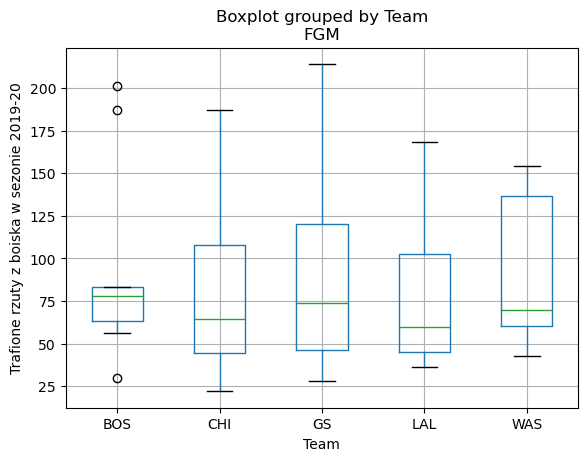

In [54]:
teams_data.boxplot(by='Team', column=['FGM'])
plt.ylabel("Trafione rzuty z boiska w sezonie 2019-20")

<function matplotlib.pyplot.show(close=None, block=None)>

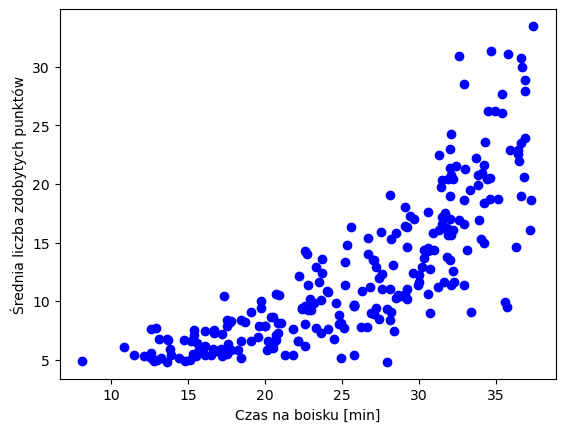

In [53]:
plt.plot(df.MPG,df.PPG,'bo')
plt.xlabel("Czas na boisku [min]")
plt.ylabel("Średnia liczba zdobytych punktów")
plt.show

In [17]:
import scipy.stats as st

In [18]:
st.spearmanr(df.MPG,df.PPG)

SpearmanrResult(correlation=0.8740615203875028, pvalue=1.0163499962824881e-79)

Text(0.5, 1.0, '')

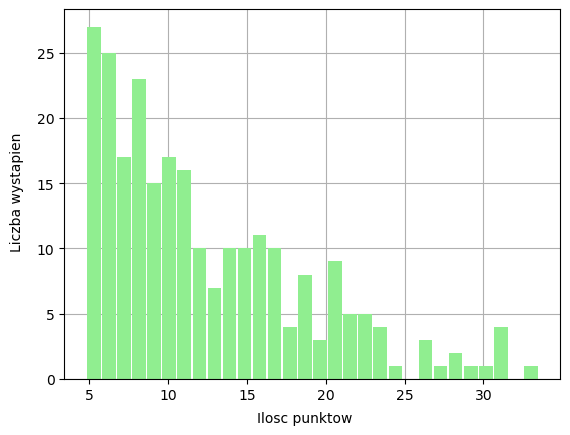

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
histogram = df.hist(column='PPG', bins=30, grid=True, figsize=(14,7), color='lightgreen', zorder=2, rwidth=0.9, sharex=True, ax=axes)
fig.text(0.5, 0.02, 'Ilosc punktow', ha='center')
fig.text(0.04, 0.5, 'Liczba wystapien', va='center', rotation='vertical')

histogram[0].set_title('')